In [27]:
import numpy as np
import matplotlib.pyplot as plt

num_experimentos = 30
num_corridas = 100

tiempos_experimentos = []
tiempos_corridas = []
criticidad_accesos_experimentos = []

tareas = {
    'A' : {'nombre' : "Romper huevos", 'demora_min': 2, 'demora_max': 4},
    'B' : {'nombre' : "Revolver huevos", 'demora_min': 3, 'demora_max': 6},
    'C' : {'nombre' : "Cocinar huevos", 'demora_min': 2, 'demora_max': 5},
    'D' : {'nombre' : "Cortar panes", 'demora_min': 3, 'demora_max': 6},
    'E' : {'nombre' : "Preparar tostadas", 'demora_min': 2, 'demora_max': 5},
    'F' : {'nombre' : "Preparar bebidas calientes", 'demora_min': 4, 'demora_max': 8},
    'G' : {'nombre' : "Preparar bebidas frías", 'demora_min': 3, 'demora_max': 7}
}

def generar_tiempo(min, max, size):
    return np.random.uniform(min, max, size)

def realizar_tarea(ref):
    tarea = tareas[ref]
    tiempo = generar_tiempo(tarea['demora_min'], tarea['demora_max'], 1)
    return tiempo

def simular_tareas():

    #Tiempos de tareas acceso superior
    tarea_a = realizar_tarea('A')
    tarea_b = realizar_tarea('B')
    tarea_c = realizar_tarea('C')
    acceso_superior = max(tarea_a + tarea_b + tarea_c)
    
    #Tiempos de tareas acceso medio
    tarea_d = realizar_tarea('D')
    tarea_e = realizar_tarea('E')
    acceso_medio = max(tarea_d + tarea_e)
    
    #Tiempos de tareas acceso inferior
    tarea_f = realizar_tarea('F')
    tarea_g = realizar_tarea('G')
    acceso_inferior = max(tarea_f + tarea_g)
    

    tiempo_total = max(acceso_superior, acceso_medio, acceso_inferior) #El tiempo maximo de los 3 accesos
    return tiempo_total, acceso_superior, acceso_medio, acceso_inferior

"""
Simular el experimento segun la cantidad de corridas de la simulacion de tareas
para determinar la criticidad de las mismas.
"""
def simular_experimento(num_corridas):
    tiempos_experimento = []
    tiempo_corridas = []
    criticidad_accesos = {'superior': 0, 'medio': 0, 'inferior': 0}

    for _ in range(num_corridas):
        tiempo_total, acceso_superior, acceso_medio, acceso_inferior = simular_tareas()
        tiempos_experimento.append(tiempo_total)

        if tiempo_total == acceso_superior:
            criticidad_accesos['superior'] += 1
        if tiempo_total == acceso_medio:
            criticidad_accesos['medio'] += 1
        if tiempo_total == acceso_inferior:
            criticidad_accesos['inferior'] += 1
    
    return tiempos_experimento, criticidad_accesos, tiempo_corridas

def calcular_intervalo_confianza(media_muestral, mult_desvio, desvio_estandar, z, n):
    # print("desvio estandar", desvio_estandar)
    error_estandar = z * ( (mult_desvio * desvio_estandar) / np.sqrt(n))
    # print("error estandar", error_estandar)
    extremo_inferior = media_muestral - error_estandar
    extremo_superior = media_muestral + error_estandar
    
    # print("ext sup", extremo_superior)
    # print("exp inf", extremo_inferior)
    return extremo_inferior, extremo_superior


In [26]:
for i in range(num_experimentos):
    tiempos_experimento, criticidad_accesos = simular_experimento(num_corridas)
    tiempos_experimentos.append(tiempos_experimento)
    criticidad_accesos_experimentos.append(criticidad_accesos)
    #print("experimento n°:",i)
print(len(tiempos_experimentos))

120


In [12]:
# 1. Calcular tiempo promedio de finalización del proyecto e IC
tiempos_experimentos = np.array(tiempos_experimentos)
tiempo_promedio_experimentos = np.mean(tiempos_experimentos)
n = num_experimentos * num_corridas
desvio_estandar = np.std(tiempos_experimentos)
ic_99_inf, ic_99_sup = calcular_intervalo_confianza(tiempo_promedio_experimentos, 1, desvio_estandar, 2.57, n)
print("Tiempo promedio de finalización del proyecto:", tiempo_promedio_experimentos)
print("Intervalo de confianza al 99%:", (ic_99_inf, ic_99_sup))

Tiempo promedio de finalización del proyecto: 11.855003349115378
Intervalo de confianza al 99%: (11.797883367601823, 11.912123330628933)


In [6]:
# 2. Calcular porcentaje de criticidad de los accesos
total_corridas = num_experimentos * num_corridas
criticidad_accesos_totales = {'superior': 0, 'medio': 0, 'inferior': 0}

for criticidad_accesos in criticidad_accesos_experimentos:
    for key, value in criticidad_accesos.items():
        criticidad_accesos_totales[key] += value

for key, value in criticidad_accesos_totales.items():
    print("Porcentaje de criticidad para acceso", key, ":", value / total_corridas * 100)


Porcentaje de criticidad para acceso superior : 49.3
Porcentaje de criticidad para acceso medio : 1.3666666666666667
Porcentaje de criticidad para acceso inferior : 49.333333333333336


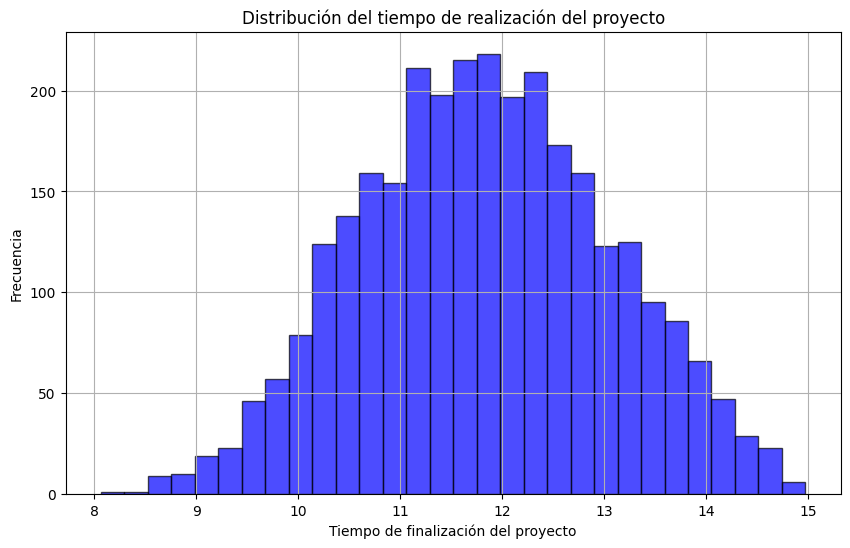

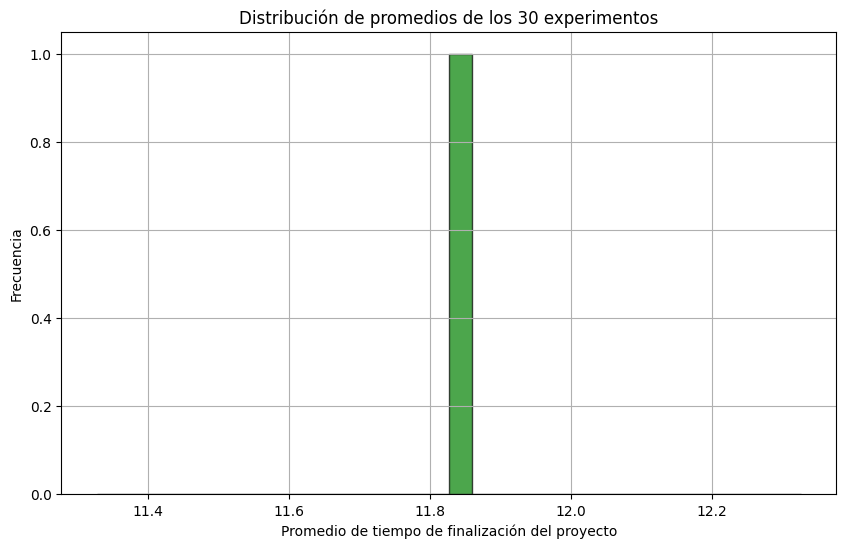

In [7]:
# 3. Graficar histograma de distribución del tiempo de realización del proyecto
plt.figure(figsize=(10, 6))
plt.hist(tiempos_experimentos.flatten(), bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribución del tiempo de realización del proyecto')
plt.xlabel('Tiempo de finalización del proyecto')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Graficar histograma de promedios de los 30 experimentos
plt.figure(figsize=(10, 6))
plt.hist(tiempo_promedio_experimentos, bins=30, alpha=0.7, color='green', edgecolor='black')
plt.title('Distribución de promedios de los 30 experimentos')
plt.xlabel('Promedio de tiempo de finalización del proyecto')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()